# Aula 03 - Python

## Numpy Arrays

In [1]:
import numpy as np

# Criando um vetor de dados aleatórios
data = np.random.rand(1000,2)

# Verificando o tamanho do vetor
print(data.shape)
print(np.size(data))

# Print de uma amostra dos dados
print(data[0:10])
print(data[0:10].shape)

(1000, 2)
2000
[[0.27364637 0.69730033]
 [0.93694517 0.76516477]
 [0.81904831 0.83690921]
 [0.03200661 0.63559202]
 [0.22818756 0.20955632]
 [0.81535737 0.97547617]
 [0.18936518 0.33149821]
 [0.02595531 0.91482974]
 [0.74737542 0.08036198]
 [0.31997808 0.03577627]]
(10, 2)


In [2]:
# Usando Monte-Carlo
dataMax = 1000
dataMin = 10
data = (dataMax - dataMin)*data + dataMin
print(data[0:10])

[[280.90990783 700.3273299 ]
 [937.57572264 767.51311909]
 [820.85782198 838.5401202 ]
 [ 41.68654705 639.23609927]
 [235.9056865  217.46075288]
 [817.20379751 975.72141132]
 [197.47152326 338.18322561]
 [ 35.695752   915.68144105]
 [749.90166436  89.55835792]
 [326.77829479  45.41850365]]


Matplotlib is building the font cache; this may take a moment.


<class 'numpy.ndarray'>


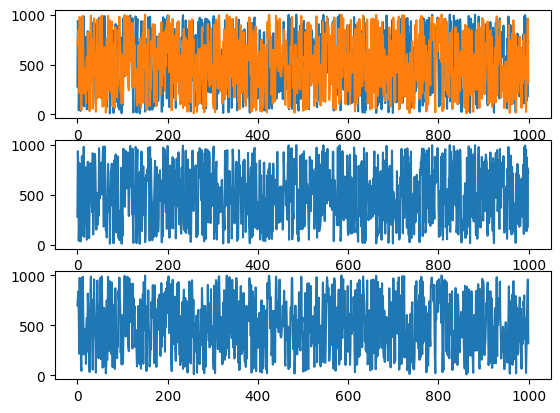

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3)
ax[0].plot(data)
ax[1].plot(data[:,0])
ax[2].plot(data[:,1])
print(type(data))

In [4]:
# Criando um dado 2D 
data3d = np.sin(np.random.rand(1000,1000))
print(data3d)

[[0.7700076  0.37556858 0.79418309 ... 0.24241211 0.78402714 0.46122609]
 [0.57283331 0.20012981 0.71749019 ... 0.39056924 0.72176845 0.82135666]
 [0.46483966 0.83697292 0.30972457 ... 0.34119005 0.22820001 0.83090707]
 ...
 [0.65922588 0.70964745 0.02688367 ... 0.18600258 0.46700125 0.4092812 ]
 [0.13057907 0.26025324 0.00490113 ... 0.72269312 0.59356374 0.56047051]
 [0.56124494 0.12658084 0.36316312 ... 0.50730949 0.70045321 0.20646327]]


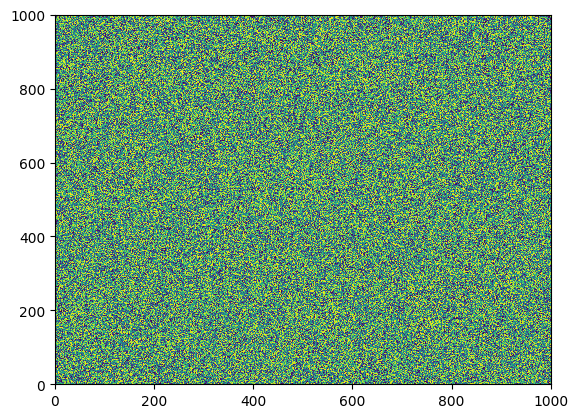

In [5]:
# Plotando um dado 3D
fig2, ax2 = plt.subplots()
ax2.pcolor(data3d)

In [6]:
# Criando vertor temporal
dtime = np.arange(np.datetime64("2022-01-01"), np.datetime64("2023-01-01"), np.timedelta64(1, "h"))
print(dtime[1:10])
print(dtime.shape)
print(type(dtime))

['2022-01-01T01' '2022-01-01T02' '2022-01-01T03' '2022-01-01T04'
 '2022-01-01T05' '2022-01-01T06' '2022-01-01T07' '2022-01-01T08'
 '2022-01-01T09']
(8760,)
<class 'numpy.ndarray'>


## Pandas

In [7]:
import pandas as pd

# Criando um dataframe
df = pd.DataFrame()

In [8]:
# Monstrando um dataframe
df['datetime'] = dtime

In [9]:
# Criando uma coluna random dentro do dataframe df
df['random'] = np.random.rand(df.shape[0])

In [10]:
df['random'][1:10]

1    0.183344
2    0.705752
3    0.667353
4    0.339744
5    0.253053
6    0.271558
7    0.544048
8    0.225556
9    0.994894
Name: random, dtype: float64

In [11]:
# Indexação
df.iloc[:,0]

0      2022-01-01 00:00:00
1      2022-01-01 01:00:00
2      2022-01-01 02:00:00
3      2022-01-01 03:00:00
4      2022-01-01 04:00:00
               ...        
8755   2022-12-31 19:00:00
8756   2022-12-31 20:00:00
8757   2022-12-31 21:00:00
8758   2022-12-31 22:00:00
8759   2022-12-31 23:00:00
Name: datetime, Length: 8760, dtype: datetime64[s]

In [12]:
# Colocando o datetime como index
df = df.set_index(df['datetime'])
df

,datetime,random
datetime,,
2022-01-01 00:00:00,2022-01-01 00:00:00,0.932837
2022-01-01 01:00:00,2022-01-01 01:00:00,0.183344
2022-01-01 02:00:00,2022-01-01 02:00:00,0.705752
2022-01-01 03:00:00,2022-01-01 03:00:00,0.667353
2022-01-01 04:00:00,2022-01-01 04:00:00,0.339744
...,...,...
2022-12-31 19:00:00,2022-12-31 19:00:00,0.165313
2022-12-31 20:00:00,2022-12-31 20:00:00,0.716294
2022-12-31 21:00:00,2022-12-31 21:00:00,0.355457


In [13]:
# Criando colunas com ano, mês e dia
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day

(8760,)


<Axes: xlabel='datetime'>

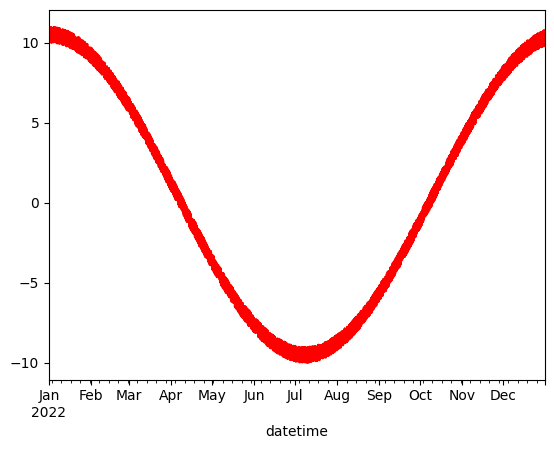

In [14]:
tt = np.arange(0,df.shape[0],1)
print(tt.shape)
df['sazonal'] = (np.cos(tt/(360*4)))
df['timeSeries'] = 10*df['sazonal']+df['random']
#df['sazonal'].plot()
df['timeSeries'].plot(color='red')

In [16]:
df

,datetime,random,year,month,day,sazonal,timeSeries
datetime,,,,,,,
2022-01-01 00:00:00,2022-01-01 00:00:00,0.932837,2022,1,1,1.000000,10.932837
2022-01-01 01:00:00,2022-01-01 01:00:00,0.183344,2022,1,1,1.000000,10.183342
2022-01-01 02:00:00,2022-01-01 02:00:00,0.705752,2022,1,1,0.999999,10.705743
2022-01-01 03:00:00,2022-01-01 03:00:00,0.667353,2022,1,1,0.999998,10.667331
2022-01-01 04:00:00,2022-01-01 04:00:00,0.339744,2022,1,1,0.999996,10.339706
...,...,...,...,...,...,...,...
2022-12-31 19:00:00,2022-12-31 19:00:00,0.165313,2022,12,31,0.979401,9.959320
2022-12-31 20:00:00,2022-12-31 20:00:00,0.716294,2022,12,31,0.979541,10.511701
2022-12-31 21:00:00,2022-12-31 21:00:00,0.355457,2022,12,31,0.979680,10.152260


In [26]:
# Salvar meu dataframe

df.to_csv(r'C:\Users\Giovanna\Desktop\24.1\Pol. ATm\Polui-ao01\ENS5173-2024_GiovannaMartins\noise_2022.csv')

In [27]:
# Criando uma função
def noiseCreation(path, year):
    """Esta função cria um ruido com sazonalidade.
    Inputs:
        path = asdasdas
        year = asdasdasdas

    Criado por Leonardo
    """
    
    # Criando um dataframe
    df = pd.DataFrame()
    
    # Criando vertor temporal
    dtime = np.arange(np.datetime64(str(year)+"-01-01"), np.datetime64(str(year+1)+"-01-01"), np.timedelta64(1, "h"))
    
    # Monstrando um dataframe
    df['datetime'] = dtime
        
    # Datetime como index do dataframe
    df = df.set_index(df['datetime'])
    
    # Criando colunas com ano, mês e dia
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    
    # Crio uma coluna random
    df['random'] = np.random.rand(df.shape[0])
    
    # Adicionar sazonalidade
    tt = np.arange(0,df.shape[0],1)
    print(tt.shape)
    df['sazonal'] = (np.cos(tt/(360*4)))
    df['timeSeries'] = 10*df['sazonal']+df['random']
    #df['sazonal'].plot()
    df['timeSeries'].plot(color='red')
    df.to_csv(path+'/noise_'+str(year)+'.csv')
    
    return df

(8760,)


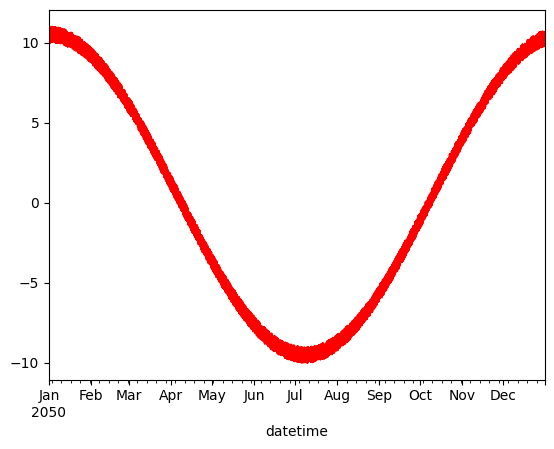

In [30]:
path = 'C:/Users/Giovanna/Desktop/24.1/Pol. ATm/Polui-ao01/ENS5173-2024_GiovannaMartins'
df2 = noiseCreation(path,2050)

2002
(8760,)
2003
(8760,)
2004
(8784,)
2005
(8760,)
2006
(8760,)
2007
(8760,)
2008
(8784,)
2009
(8760,)


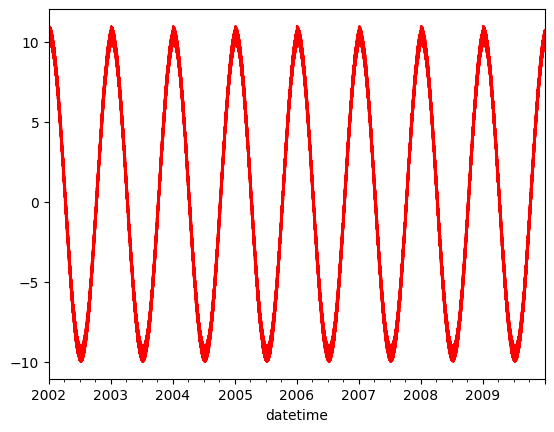

In [31]:
# Primeira opção de loop
for ii in range(2002,2010):
    print(ii)
    df = noiseCreation(path,ii)

In [32]:
df

,datetime,year,month,day,random,sazonal,timeSeries
datetime,,,,,,,
2009-01-01 00:00:00,2009-01-01 00:00:00,2009,1,1,0.488904,1.000000,10.488904
2009-01-01 01:00:00,2009-01-01 01:00:00,2009,1,1,0.959126,1.000000,10.959124
2009-01-01 02:00:00,2009-01-01 02:00:00,2009,1,1,0.559803,0.999999,10.559793
2009-01-01 03:00:00,2009-01-01 03:00:00,2009,1,1,0.480921,0.999998,10.480899
2009-01-01 04:00:00,2009-01-01 04:00:00,2009,1,1,0.876168,0.999996,10.876129
...,...,...,...,...,...,...,...
2009-12-31 19:00:00,2009-12-31 19:00:00,2009,12,31,0.289873,0.979401,10.083880
2009-12-31 20:00:00,2009-12-31 20:00:00,2009,12,31,0.147919,0.979541,9.943327
2009-12-31 21:00:00,2009-12-31 21:00:00,2009,12,31,0.330179,0.979680,10.126982


2001
2030
2032
(8784,)
2053
(8760,)
2060
(8784,)


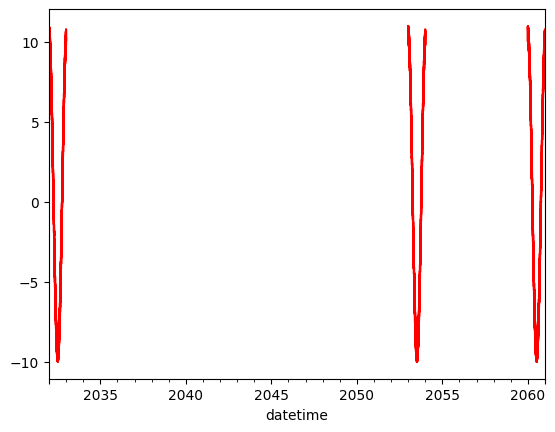

In [33]:
anos = [2001,2030,2032,2053,2060]

for ano in anos:
    print(ano)
    if ano > 2030:
        df = noiseCreation(path,ano)

In [34]:
import os
files = os.listdir(path)
print(files)

allData = []
for file in files:
    if file.endswith('.csv'):
        print(file)
        data = pd.read_csv(path+'/'+file)
        allData.append(data)

['Atividade01_Etapa01.ipynb', 'noise_2002.csv', 'noise_2003.csv', 'noise_2004.csv', 'noise_2005.csv', 'noise_2006.csv', 'noise_2007.csv', 'noise_2008.csv', 'noise_2009.csv', 'noise_2022.csv', 'noise_2032.csv', 'noise_2050.csv', 'noise_2053.csv', 'noise_2060.csv', 'venv']
noise_2002.csv
noise_2003.csv
noise_2004.csv
noise_2005.csv
noise_2006.csv
noise_2007.csv
noise_2008.csv
noise_2009.csv
noise_2022.csv
noise_2032.csv
noise_2050.csv
noise_2053.csv
noise_2060.csv


In [35]:
allDataDf = pd.concat(allData)

In [36]:
allDataDf

,datetime,datetime.1,year,month,day,random,sazonal,timeSeries
0,2002-01-01 00:00:00,2002-01-01 00:00:00,2002,1,1,0.654260,1.000000,10.654260
1,2002-01-01 01:00:00,2002-01-01 01:00:00,2002,1,1,0.501341,1.000000,10.501338
2,2002-01-01 02:00:00,2002-01-01 02:00:00,2002,1,1,0.159298,0.999999,10.159288
3,2002-01-01 03:00:00,2002-01-01 03:00:00,2002,1,1,0.842609,0.999998,10.842587
4,2002-01-01 04:00:00,2002-01-01 04:00:00,2002,1,1,0.211145,0.999996,10.211107
...,...,...,...,...,...,...,...,...
8779,2060-12-31 19:00:00,2060-12-31 19:00:00,2060,12,31,0.760948,0.982630,10.587248
8780,2060-12-31 20:00:00,2060-12-31 20:00:00,2060,12,31,0.573679,0.982759,10.401265
8781,2060-12-31 21:00:00,2060-12-31 21:00:00,2060,12,31,0.528605,0.982887,10.357473
8782,2060-12-31 22:00:00,2060-12-31 22:00:00,2060,12,31,0.376243,0.983014,10.206388


In [ ]:
plt.plot(allDataDf['datetime'],allDataDf['timeSeries'])